# Pymaceuticals Inc.
---

### Analysis

- According to the boxplot, the effectiveness of Capomulin and Ramicane are comparible and significantly more effective than Infubinol and Ceftamine.  

- The data shows for mice under Capomulin - the more they weigh, the less effective the drug was.  This data is represented with the scatter plot and confirmed with a linear regression of 0.84 which is close to 1.
 

In [83]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice.
mouse_count = combined_mouse_df["Mouse ID"].nunique()
mouse_count

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_df[combined_mouse_df[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_clean_df = combined_mouse_df[~combined_mouse_df["Mouse ID"].isin(duplicate_mice)]
combined_mouse_clean_df.to_csv("data/Combined_mouse_clean.csv")
combined_mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [88]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = combined_mouse_clean_df["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = combined_mouse_clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = combined_mouse_clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = combined_mouse_clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_st_dev = combined_mouse_clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = combined_mouse_clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame({
     "Mean Tumor Volume": tumor_mean,
     "Median Tumor Volume": tumor_median,
     "Tumor Volume Variance": tumor_variance,
     "Tumor Volume St Dev": tumor_st_dev,
     "Tumor Volume St Err": tumor_sem
 })

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St Dev,Tumor Volume St Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary_agg = combined_mouse_clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
tumor_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

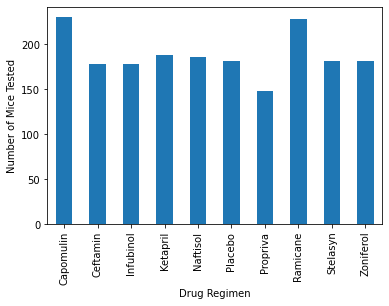

In [109]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_tested = combined_mouse_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_bar_chart = mouse_tested.plot(kind="bar", ylabel="Number of Mice Tested")

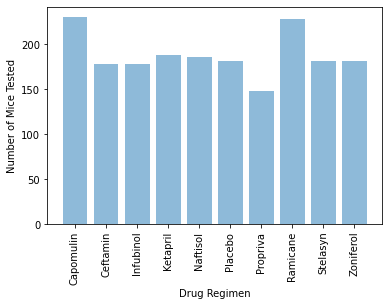

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_tested))
plt.bar(x_axis, mouse_tested, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, combined_mouse_clean_df["Drug Regimen"].sort_values().unique(), rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


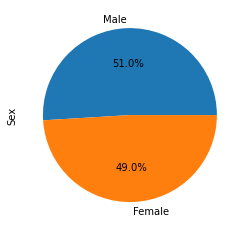

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = combined_mouse_clean_df.groupby(["Sex"]).count()["Mouse ID"].sort_values(ascending=False)
mouse_pie_chart = mouse_sex.plot(kind="pie", ylabel="Sex", autopct="%.1f%%")

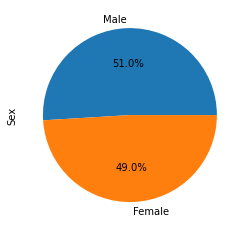

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = combined_mouse_clean_df["Sex"].sort_values(ascending=False).unique()

plt.pie(mouse_sex, labels=labels, autopct="%.1f%%")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = combined_mouse_clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(max_timepoint_df, combined_mouse_clean_df, on=["Mouse ID","Timepoint"], how="left")
final_volume_df.to_csv("data/Final_volume.csv")
final_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
regimen_data = []

for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_volume = final_volume_df[(final_volume_df["Drug Regimen"] == drug)]["Tumor Volume (mm3)"]

    # add subset 
    regimen_data.append(regimen_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = regimen_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
           
    # Determine outliers using upper and lower bounds
    outliers = regimen_volume[(regimen_volume >= upper_bound) | (regimen_volume <= lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


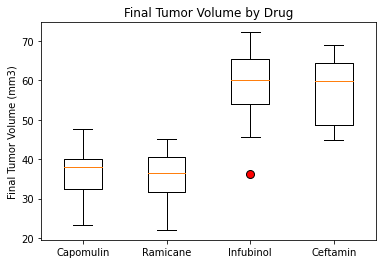

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(regimen_data, flierprops=flierprops)

# Add title and labels to box plot
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],regimens)

plt.show()


## Line and Scatter Plots

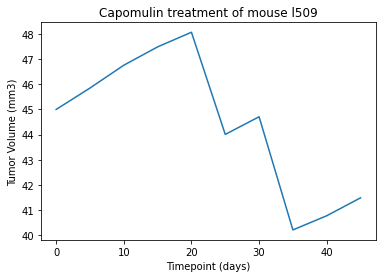

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_values = combined_mouse_clean_df[(combined_mouse_clean_df["Mouse ID"] == "l509")]["Timepoint"]
y_values = combined_mouse_clean_df[(combined_mouse_clean_df["Mouse ID"] == "l509")]["Tumor Volume (mm3)"]

# Add title and labels to line plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.plot(x_values,y_values)

plt.show()


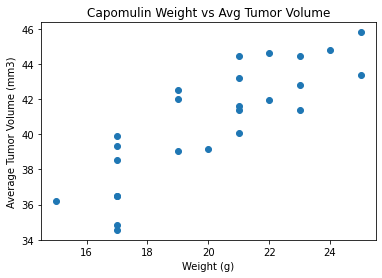

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_mouse_clean_df[(combined_mouse_clean_df["Drug Regimen"] == "Capomulin")]

capomulin_weight = capomulin_df[["Mouse ID","Weight (g)"]].drop_duplicates()
capomulin_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capomulin_data = pd.merge(capomulin_weight, capomulin_volume, on="Mouse ID", how="left")

x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Tumor Volume (mm3)"]

# Add lables to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Weight vs Avg Tumor Volume")
plt.scatter(x_values, y_values)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume on the Capomulin regimen is 0.84.


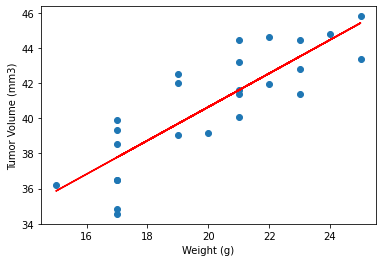

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume on the Capomulin regimen is {correlation[0]:.2f}.")

slope, intercept, r, p, stderr = st.linregress(x_values,y_values)

# Add labels to plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_values, x_values * slope + intercept, color='r')
plt.scatter(x_values,y_values)
plt.show()
